In [1]:
import osmnx as ox #this package allows us to communicate with openstreet map api
import networkx as nx #this package is useful to find shortest path 
import plotly.graph_objects as go
import numpy as np
import copy

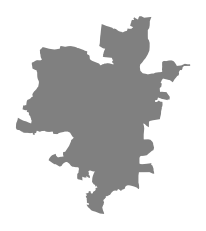

In [2]:
#getting an outline of hyderabad
city = ox.geocode_to_gdf('hyderabad,india')
ax = ox.project_gdf(city).plot(fc='gray', ec='none')
_ = ax.axis('off')

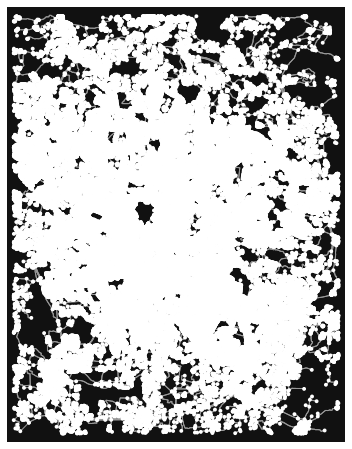

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [3]:
#getting all the nodes and edges present in a rectangular block present in  total hyderabad
north, east, south, west =17.633898816711536, 78.690870, 17.188644, 78.327791
#getting a rectangular block bounded by the given north,east,west and south values
G = ox.graph_from_bbox(north, south, east, west, network_type = 'drive')
ox.plot_graph(G)

In [4]:
list(G.nodes(data=True))[2]

(245640576, {'y': 17.3921271, 'x': 78.5162295, 'street_count': 3})

In [5]:
list(G.edges(data=True))[1]

(245640546,
 3155747522,
 {'osmid': 310184774,
  'oneway': False,
  'ref': 'NH163',
  'highway': 'trunk',
  'length': 8.781})

In [6]:
list(G.edges(data=True))[2]

(245640546,
 4342904955,
 {'osmid': [436397571, 436397573],
  'oneway': True,
  'ref': 'NH163',
  'highway': 'trunk',
  'length': 161.562,
  'geometry': <shapely.geometry.linestring.LineString at 0x25ef643c5e0>})

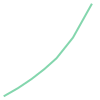

In [7]:
list(G.edges(data=True))[2][2]['geometry']

In [8]:
list(G.edges(data=True))

[(245640546,
  307055815,
  {'osmid': 22839658,
   'ref': 'NH163',
   'highway': 'trunk',
   'oneway': False,
   'length': 30.902}),
 (245640546,
  3155747522,
  {'osmid': 310184774,
   'oneway': False,
   'ref': 'NH163',
   'highway': 'trunk',
   'length': 8.781}),
 (245640546,
  4342904955,
  {'osmid': [436397571, 436397573],
   'oneway': True,
   'ref': 'NH163',
   'highway': 'trunk',
   'length': 161.562,
   'geometry': <shapely.geometry.linestring.LineString at 0x25ef643c5e0>}),
 (245640570,
  2177311107,
  {'osmid': 52975929,
   'oneway': True,
   'lanes': '3',
   'ref': 'NH163;SH4',
   'name': 'Mahavir Marg',
   'highway': 'trunk',
   'maxspeed': '50',
   'length': 41.154}),
 (245640570,
  309713869,
  {'osmid': 28197085,
   'bridge': 'yes',
   'lanes': '4',
   'ref': 'NH163;SH4',
   'name': 'Masab Tank Flyover',
   'highway': 'trunk',
   'oneway': False,
   'length': 780.424,
   'geometry': <shapely.geometry.linestring.LineString at 0x25ef643c730>}),
 (245640576,
  3184120704,


In [9]:
origin_point = (17.240283781751216, 78.42938509722205)
destination_point = (17.544880777213955, 78.57177569722654)
# getting the nearest node to origin_point in the nodes given by osm
origin_near_node = ox.get_nearest_node(G,origin_point)
# getting the nearest node to destination_point in the nodes given by osm
destination_near_node = ox.get_nearest_node(G,destination_point)
origin_near_node,destination_near_node

(2578553573, 4185071135)

I have used the below commented code to get the time travels between different nodes given by openstreetmap api from
distance matrix api. I removed the api key below as my google cloud account is paid account. I have stored all the time information given by distance matrix api in a file named times.txt

->distance matrix api url consists of origins and destinations. In each request the api sends back all the information about the routes between all the combinations of sources and destinations which are included in the url.But, the maximum number of elements(combinations of sources and destinations) that we can get in a single request is 100. But all the 100 elements are not useful for us and only the diagonal elements of that 100 element matrix are required.  so in each request i am storing 10 diagonal elements information(time) in times.txt file in the below code.

In [10]:
# f = open('times.txt','a')
# url = 'https://maps.googleapis.com/maps/api/distancematrix/json?units=imperial&'
# origins = ""
# destinations = ""
# api_key = ""
# arr = list(G.edges(data=True))
# length = len(arr)
# k = 0
# while k+10 < length:
#     for i in range(k,k+10):
#         p1 = get_latlong(arr[i][0])
#         p2 = get_latlong(arr[i][1])
#         origins += str(p1[0])+','+str(p1[1])
#         destinations+= str(p2[0]) + ','+ str(p2[1])
#         if i!=k+9:
#             origins+='|'
#             destinations+='|'
#     r = requests.get(url+'origins='+origins+'&destinations='+destinations+"&key="+api_key)
#     data = r.json()
#     for i in range(k,k+10):
#         f.write(str(data['rows'][i-k]['elements'][i-k]['duration']['value'])+'\n')
#     k+=10
#     origins=""
#     destinations = ""
    
# for i in range(k,length):
#     p1 = get_latlong(arr[i][0])
#     p2  = get_latlong(arr[i][1])
#     origins += str(p1[0])+','+str(p1[1])
#     destinations+= str(p2[0]) + ','+ str(p2[1])
#     if i!=length-1:
#         origins+='|'
#         destinations+='|'
# r = requests.get(url+'origins='+origins+'&destinations='+destinations+"&key="+api_key)
# data = r.json()
# for i in range(k,length):
#     f.write(str(data['rows'][i-k]['elements'][i-k]['duration']['value'])+'\n')
# f.close()
            

In [11]:
# here i am getting all the time information i have stored in times.txt file and adding an attribute called time to  
# all the edges given by openstreetmap api
f = open('times.txt','r')
#converting edges info into a list
arr = list(G.edges(data=True))
for i in range(len(arr)):
    x = f.readline()
    arr[i][2]['time'] = int(x)
f.close()

In [12]:
#converting the array arr into a diagraph
Gnew = nx.classes.multidigraph.MultiDiGraph(arr)

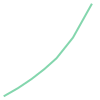

In [13]:
list(Gnew.edges(data=True))[2][2]['geometry']

In [14]:
#shortest_path method returns optimal route using an inbuilt best first search algorithm taking time as a heuristic
route = nx.shortest_path(Gnew,origin_near_node,destination_near_node,weight = 'time')

In [27]:
def plot_path(lat, long, origin_point, destination_point):
    
    """
    Given a list of latitudes and longitudes, origin 
    and destination point, plots a path on a map
    
    Parameters
    ----------
    lat, long: list of latitudes and longitudes
    origin_point, destination_point: co-ordinates of origin
    and destination
    Returns
    -------
    Nothing. Only shows the map.
    """
    # adding the lines joining the nodes
    fig = go.Figure(go.Scattermapbox(
        name = "Path",
        mode = "lines",
        lon = long,
        lat = lat,
        marker = {'size': 10},
        line = dict(width = 4.5, color = 'blue')))
    # adding source marker
    fig.add_trace(go.Scattermapbox(
        name = "Source",
        mode = "markers",
        lon = [origin_point[1]],
        lat = [origin_point[0]],
        marker = {'size': 12, 'color':"red"}))
     
    # adding destination marker
    fig.add_trace(go.Scattermapbox(
        name = "Destination",
        mode = "markers",
        lon = [destination_point[1]],
        lat = [destination_point[0]],
        marker = {'size': 12, 'color':'green'}))
    
    # getting center for plots:
    lat_center = np.mean(lat)
    long_center = np.mean(long)
    # defining the layout using mapbox_style
    fig.update_layout(mapbox_style="stamen-terrain",
        mapbox_center_lat = 30, mapbox_center_lon=-80)
    fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0},
                      mapbox = {
                          'center': {'lat': lat_center, 
                          'lon': long_center},
                          'zoom': 9})
    fig.show()

In [25]:
#getting all the latitudes and longitudes of all the nodes present in our optimal route
lat =[]
long =[]
for i in route:
    point = G.nodes[i]
    lat.append(point['y'])
    long.append(point['x'])

In [28]:
plot_path(lat, long, origin_point, destination_point)

In [18]:
#this code replaces the staright lines present in above graph with corresponding curved lines
def node_list_to_path(G, node_list):
    """
    Given a list of nodes, return a list of lines that together
    follow the path
    defined by the list of nodes.
    Parameters
    ----------
    G : networkx multidigraph
    route : list
        the route as a list of nodes
    Returns
    -------
    lines : list of lines given as pairs ( (x_start, y_start), 
    (x_stop, y_stop) )
    """
    edge_nodes = list(zip(node_list[:-1], node_list[1:]))
    print(edge_nodes)
    print('------------------------------------')
    lines = []
    for u, v in edge_nodes:
        # if there are parallel edges, select the shortest in length
        data = min(G.get_edge_data(u, v).values(), 
                   key=lambda x: x['length'])
        # if it has a geometry attribute
        if 'geometry' in data:
            # add them to the list of lines to plot
            xs, ys = data['geometry'].xy
            lines.append(list(zip(xs, ys)))
        else:
            # if it doesn't have a geometry attribute,
            # then the edge is a straight line from node to node
            x1 = G.nodes[u]['x']
            y1 = G.nodes[u]['y']
            x2 = G.nodes[v]['x']
            y2 = G.nodes[v]['y']
            line = [(x1, y1), (x2, y2)]
            lines.append(line)
    return lines

In [19]:
lines = node_list_to_path(G, route)

[(2578553573, 7673632705), (7673632705, 1235830524), (1235830524, 320242453), (320242453, 2090103693), (2090103693, 1235830559), (1235830559, 5599813887), (5599813887, 5599813890), (5599813890, 320407371), (320407371, 1235830532), (1235830532, 320407535), (320407535, 320407537), (320407537, 2581959009), (2581959009, 3602398133), (3602398133, 3602398158), (3602398158, 3666158922), (3666158922, 307067545), (307067545, 2180951833), (2180951833, 2180951946), (2180951946, 2180952040), (2180952040, 2180951877), (2180951877, 5746374859), (5746374859, 5746374849), (5746374849, 1323174931), (1323174931, 2090009528), (2090009528, 1323174880), (1323174880, 2082939847), (2082939847, 1521002267), (1521002267, 1521097406), (1521097406, 2199688088), (2199688088, 4310435012), (4310435012, 2199688101), (2199688101, 2199688102), (2199688102, 3754077522), (3754077522, 4308409921), (4308409921, 4308409926), (4308409926, 4308409928), (4308409928, 3754077517), (3754077517, 2509297528), (2509297528, 32545394

In [20]:
lat2=[]
long2=[]
for i in range(len(lines)):
    z = list(lines[i])
    l1 = list(list(zip(*z))[0])
    l2 = list(list(zip(*z))[1])
    for j in range(len(l1)):
        long2.append(l1[j])
        lat2.append(l2[j])

In [29]:
plot_path(lat2, long2, origin_point, destination_point)